ASSIGNMENT 1: Use StatsBomb's free event data on the FA Women's Super League 2020/2021 Season. Assume you are Manchester City and you're going up against Chelsea. Build an optimal, data-driven attacking corner kick session that you'd implement in practice. Explain your thought process, data approach, algorithm performance.

ASSIGNMENT 2: Is event data good for evaluating defending, yes or no? Explain why.

# Explanation
1. Thought Process
*   Assuming Manchester City going up against Chelsea, I tried to recollect all of Manchester City corner event data and check which corner pattern that works the most and try to practice that kind of corner pattern for the next game.
*   I tried to differentiate between straight corner without interference from opposition and corner with interference. My reason for that because most of the corners with interference from opposition team have big luck factor which are the second balls from opposition touches. Straight corner without interference also have luck factor, but not bigger than with interference.
*   I also tried to visualize the play pattern resulting into a goal so we can see clearly how the corner sequence plays out. From here, we can reuse the corner sequence that worked well before in another game
*   With the corner sequence data, we can see what type of pass and which pass height and pass technique that works the most for City corner. We can also decide which side of corner works the most for City and which area that City should attack the most.
*   Another things we could get from the event data are we can check which area is the most vulnerable from corner for Chelsea.

2. Data Approach
*   Get all Manchester City event data from the season.
*   Filter unnecessary data that was not needed for the analysis.
*   Group the data based on each corner possession sequence so we can differentiate between corner sequence easily
*   Separate which corner sequence resulting into a goal or shot or leads to nothing.
*   Summarize the corner sequence into one row so we can see the data more easily.
*   Visualize corner that resulting into goal data.








In [ ]:
!pip install statsbombpy
!pip install mplsoccer
from statsbombpy import sb
import pandas as pd

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_colwidth', None)
from mplsoccer import VerticalPitch,Pitch
import warnings
warnings.filterwarnings('ignore')

In [ ]:
sb.competitions().head(5)

competition_id  season_id country_name  competition_name  \
0               9         27      Germany     1. Bundesliga   
1              16          4       Europe  Champions League   
2              16          1       Europe  Champions League   
3              16          2       Europe  Champions League   
4              16         27       Europe  Champions League   

  competition_gender  competition_youth  competition_international  \
0               male              False                      False   
1               male              False                      False   
2               male              False                      False   
3               male              False                      False   
4               male              False                      False   

  season_name               match_updated        match_updated_360  \
0   2015/2016  2023-12-12T07:43:33.436182                     None   
1   2018/2019  2023-03-07T12:20:48.118250  2021-06-13T16:17:31.694   
2   2017/2018  2021-08-27T11:26:39.802832  2021-06-13T16:17:31.694   
3   2016/2017  2021-08-27T11:26:39.802832  2021-06-13T16:17:31.694   
4   2015/2016  2021-08-27T11:26:39.802832  2021-06-13T16:17:31.694   

  match_available_360             match_available  
0                None  2023-12-12T07:43:33.436182  
1                None  2023-03-07T12:20:48.118250  
2                None  2021-01-23T21:55:30.425330  
3                None            2020-07-29T05:00  
4                None            2020-07-29T05:00

In [ ]:
df = sb.matches(competition_id=37, season_id=90)
df.head(5)

match_id  match_date      kick_off                        competition  \
0   3775648  2021-02-28  15:00:00.000  England - FA Women's Super League   
1   3775609  2021-04-28  20:30:00.000  England - FA Women's Super League   
2   3775633  2021-02-06  13:30:00.000  England - FA Women's Super League   
3   3775570  2021-03-28  13:30:00.000  England - FA Women's Super League   
4   3775581  2021-03-28  15:30:00.000  England - FA Women's Super League   

      season                   home_team                away_team  home_score  \
0  2020/2021                 Aston Villa              Arsenal WFC           0   
1  2020/2021                 Arsenal WFC      West Ham United LFC           2   
2  2020/2021                 Aston Villa  Tottenham Hotspur Women           1   
3  2020/2021  Brighton & Hove Albion WFC              Everton LFC           0   
4  2020/2021                 Chelsea FCW              Aston Villa           2   

   away_score match_status match_status_360                last_updated  \
0           4    available        scheduled  2022-11-29T22:20:07.837668   
1           0    available        scheduled  2023-02-24T20:39:46.594213   
2           0    available        scheduled  2022-11-29T22:16:43.212186   
3           5    available        scheduled  2021-04-13T21:46:33.264800   
4           0    available        scheduled  2023-02-24T20:38:29.557046   

          last_updated_360  match_week competition_stage  \
0  2021-06-13T16:17:31.694          11    Regular Season   
1  2021-06-13T16:17:31.694          13    Regular Season   
2  2021-06-13T16:17:31.694          14    Regular Season   
3  2021-06-13T16:17:31.694          18    Regular Season   
4  2021-06-13T16:17:31.694          18    Regular Season   

                    stadium               referee         home_managers  \
0  Poundland Bescot Stadium             Lisa Benn         Marcus Bignot   
1              Meadow Park          Emily Heaslip     Joseph Montemurro   
2  Poundland Bescot Stadium            Jane Simms         Marcus Bignot   
3        Broadfield Stadium  Christina Hattersley  Hope Patricia Powell   
4               Kingsmeadow         Sarah Garratt            Emma Hayes   

       away_managers data_version shot_fidelity_version xy_fidelity_version  
0  Joseph Montemurro        1.1.0                     2                   2  
1        Olli Harder        1.1.0                     2                   2  
2    Rehanne Skinner        1.1.0                     2                   2  
3        Willie Kirk        1.1.0                     2                   2  
4      Marcus Bignot        1.1.0                     2                   2

# Analyze City Corner Attack

In [ ]:
# Get Manchester City Game Data
home_game = df.loc[df.home_team=='Manchester City WFC']
away_game = df.loc[df.away_team=='Manchester City WFC']
city_game = pd.concat([home_game,away_game],axis=0).reset_index(drop=True)
match_id = city_game.match_id.unique()
city_game

match_id  match_date      kick_off                        competition  \
0    3764241  2020-09-13  15:00:00.000  England - FA Women's Super League   
1    3775545  2020-10-04  13:30:00.000  England - FA Women's Super League   
2    3775564  2021-03-27  18:30:00.000  England - FA Women's Super League   
3    3775576  2021-04-21  19:00:00.000  England - FA Women's Super League   
4    3775574  2021-05-02  16:00:00.000  England - FA Women's Super League   
5    3775626  2021-01-17  13:30:00.000  England - FA Women's Super League   
6    3775625  2020-11-07  16:00:00.000  England - FA Women's Super League   
7    3775651  2021-01-31  15:00:00.000  England - FA Women's Super League   
8    3775639  2021-03-07  15:00:00.000  England - FA Women's Super League   
9    3775658  2021-02-12  20:00:00.000  England - FA Women's Super League   
10   3775583  2020-12-13  15:30:00.000  England - FA Women's Super League   
11   3775624  2020-11-14  13:30:00.000  England - FA Women's Super League   
12   3764234  2020-09-05  15:30:00.000  England - FA Women's Super League   
13   3775596  2021-03-17  20:30:00.000  England - FA Women's Super League   
14   3775573  2021-05-09  15:30:00.000  England - FA Women's Super League   
15   3775611  2020-10-11  15:30:00.000  England - FA Women's Super League   
16   3775632  2020-12-06  15:30:00.000  England - FA Women's Super League   
17   3775629  2021-01-24  15:00:00.000  England - FA Women's Super League   
18   3775600  2021-02-07  15:30:00.000  England - FA Women's Super League   
19   3775659  2020-10-18  15:00:00.000  England - FA Women's Super League   
20   3775547  2021-02-28  15:00:00.000  England - FA Women's Super League   
21   3775604  2021-04-04  15:00:00.000  England - FA Women's Super League   

       season                   home_team                   away_team  \
0   2020/2021         Manchester City WFC  Brighton & Hove Albion WFC   
1   2020/2021         Manchester City WFC     Tottenham Hotspur Women   
2   2020/2021         Manchester City WFC                 Reading WFC   
3   2020/2021         Manchester City WFC                 Chelsea FCW   
4   2020/2021         Manchester City WFC         Birmingham City WFC   
5   2020/2021         Manchester City WFC                 Aston Villa   
6   2020/2021         Manchester City WFC            Bristol City WFC   
7   2020/2021         Manchester City WFC         West Ham United LFC   
8   2020/2021         Manchester City WFC                 Everton LFC   
9   2020/2021         Manchester City WFC           Manchester United   
10  2020/2021         Manchester City WFC                 Arsenal WFC   
11  2020/2021           Manchester United         Manchester City WFC   
12  2020/2021                 Aston Villa         Manchester City WFC   
13  2020/2021            Bristol City WFC         Manchester City WFC   
14  2020/2021         West Ham United LFC         Manchester City WFC   
15  2020/2021                 Chelsea FCW         Manchester City WFC   
16  2020/2021                 Everton LFC         Manchester City WFC   
17  2020/2021  Brighton & Hove Albion WFC         Manchester City WFC   
18  2020/2021                 Arsenal WFC         Manchester City WFC   
19  2020/2021                 Reading WFC         Manchester City WFC   
20  2020/2021         Birmingham City WFC         Manchester City WFC   
21  2020/2021     Tottenham Hotspur Women         Manchester City WFC   

    home_score  away_score match_status match_status_360  \
0            0           0    available        scheduled   
1            4           1    available        scheduled   
2            1           0    available        scheduled   
3            2           2    available        scheduled   
4            4           0    available        scheduled   
5            7           0    available        scheduled   
6            8           1    available        scheduled   
7            4           0    available        scheduled   
8           

In [ ]:
match_id

array([3764241, 3775545, 3775564, 3775576, 3775574, 3775626, 3775625,
       3775651, 3775639, 3775658, 3775583, 3775624, 3764234, 3775596,
       3775573, 3775611, 3775632, 3775629, 3775600, 3775659, 3775547,
       3775604])

In [ ]:
import numpy as np
# Convert location coordinates so we can easily plot the data when events happened for attacking team and defending team in the same sequence
def convert_coordinates(x):
  if type(x) == list:
    if x[0] < 60:
      x_new = 120 - x[0]
    else:
      x_new = x[0]

    y_new = x[1]

    return [x_new, y_new]

  else:
    return np.nan

In [ ]:
# Get Data with From Corner play pattern using statsbombpy library
all_data = pd.DataFrame()
for i in match_id:
  #pass_events = sb.events(match_id=i, split=True, flatten_attrs=False)["passes"]
  events = sb.events(match_id=i)
  events['location'] = events.location.apply(lambda x: convert_coordinates(x))
  events['pass_end_location'] = events.pass_end_location.apply(lambda x: convert_coordinates(x))
  corner_data = events.loc[events.play_pattern=='From Corner']
  all_data = pd.concat([all_data,corner_data],axis=0)
  all_data = all_data.sort_values(['match_id','period','timestamp'])


In [ ]:
null_location= all_data.loc[all_data.location.isnull()]
null_location_type= null_location.type.unique()

In [ ]:
null_location_type

array(['Substitution', 'Half End', 'Injury Stoppage', 'Half Start',
       'Tactical Shift', 'Player Off', 'Player On'], dtype=object)

## Filter and Grouping Data
I tried to filter not needed data and get Manchester City offense and defense corner data. I also group each possession into one possession id so we can differentiate each corner sequence easily

In [ ]:
# Get Offense and Defense Corner Data
for i in null_location_type:
  all_data = all_data.loc[all_data['type']!=i].reset_index(drop=True)
all_data = all_data.loc[all_data['type']!='Ball Receipt*']
all_data = all_data.loc[all_data['type']!='Duel']
all_data = all_data.loc[all_data['type']!='Pressure']
all_data = all_data.loc[all_data['goalkeeper_type']!='Goal Conceded']

offense_corner = all_data.loc[(all_data.possession_team=='Manchester City WFC')].reset_index(drop=True)
defense_corner = all_data.loc[(all_data.possession_team!='Manchester City WFC')].reset_index(drop=True)

# Group multiple events in one Corner Sequence
offense_corner['id_possession'] = offense_corner['match_id'].astype(str)+'_'+offense_corner['possession'].astype(str)
corner_event = offense_corner.id_possession.unique()
flag = 0
for i in corner_event:
    offense_corner.loc[offense_corner['id_possession']==i,'id_possession'] = flag
    flag+=1

## City Corner Shot and Goal
I tried to find out which corner sequence resulting into a goal or shot by checking the shot outcome of each possession id

In [ ]:
# Check If Possession Resulting into a goal or not
for i in offense_corner['id_possession'].unique():
  goal = 0
  temp = offense_corner.loc[offense_corner['id_possession']==i]
  flag = 1
  for j in temp.index:
    #print(j)
    test = offense_corner.iloc[j]
    if test['shot_outcome']=='Goal':
      goal=1
    offense_corner.loc[offense_corner.index==j,'corner_sequence'] = flag
    flag+=1
  offense_corner.loc[offense_corner['id_possession']==i,'total_sequence'] = flag
  offense_corner.loc[offense_corner['id_possession']==i,'corner_goal'] = goal


In [ ]:
# Check If Possession Resulting into a shot or not
for i in offense_corner['id_possession'].unique():
  shot = 0
  temp = offense_corner.loc[offense_corner['id_possession']==i]
  flag = 1
  for j in temp.index:
    #print(j)
    test = offense_corner.iloc[j]

    if str(test.shot_outcome)!='nan':
      shot=1
      offense_corner.loc[offense_corner.index==j,'corner_sequence'] = flag
    flag+=1
  offense_corner.loc[offense_corner['id_possession']==i,'total_sequence'] = flag-1
  offense_corner.loc[offense_corner['id_possession']==i,'corner_shot'] = shot


In [ ]:
offense_corner.type.unique()

array(['Pass', 'Carry', 'Clearance', 'Ball Recovery', 'Block',
       'Foul Committed', 'Foul Won', 'Miscontrol', 'Dribbled Past',
       'Dribble', 'Shot', 'Goal Keeper', 'Interception', 'Error',
       'Dispossessed', 'Shield', '50/50', 'Own Goal For',
       'Own Goal Against'], dtype=object)

In [ ]:
# offense_corner['end_location_x'] = offense_corner.pass_end_location.apply(lambda x: x[0])
# offense_corner['end_location_y'] = offense_corner.pass_end_location.apply(lambda x: x[1])
offense_corner['location_x'] = offense_corner['location'].apply(lambda x: x[0])
offense_corner['location_y'] = offense_corner['location'].apply(lambda x: x[1])

In [ ]:
corner_goal = offense_corner.loc[offense_corner['corner_goal']==1]
corner_nogoal = offense_corner.loc[offense_corner['corner_goal']==1]
corner_shot = offense_corner.loc[offense_corner['corner_shot']==1]
corner_noshot = offense_corner.loc[offense_corner['corner_shot']==0]

In [ ]:
corner_goal.id_possession.unique()

array([20, 28, 67, 69, 78, 106, 122, 123, 130, 136, 153, 154, 157],
      dtype=object)

In [ ]:
corner_goal['shot_location_x']=0
corner_goal['shot_location_y']=0
for i in corner_goal.index:
  if str(corner_goal['shot_outcome'][i])!='nan':
    corner_goal['shot_location_x'][i]=corner_goal.shot_end_location[i][0]
    corner_goal['shot_location_y'][i]=corner_goal.shot_end_location[i][1]

In [ ]:
corner_goal.shot_outcome.unique()

array([nan, 'Blocked', 'Goal', 'Saved'], dtype=object)

In [ ]:
corner_goal_data = corner_goal[['player','team','type','pass_type','pass_body_part','pass_height','pass_technique','shot_outcome','goalkeeper_type','total_sequence','id_possession','location_x','location_y']]
corner_goal_data.head(8)

player                     team           type  \
123  Janine Elizabeth Beckie      Manchester City WFC           Pass   
124       Stephanie Houghton      Manchester City WFC           Shot   
125    Rebecca Leigh Spencer  Tottenham Hotspur Women    Goal Keeper   
126              Ellen White      Manchester City WFC          Block   
127              Ellen White      Manchester City WFC  Ball Recovery   
128              Ellen White      Manchester City WFC           Shot   
198              Lauren Hemp      Manchester City WFC           Pass   
199      Samantha June Mewis      Manchester City WFC           Shot   

    pass_type pass_body_part pass_height pass_technique shot_outcome  \
123    Corner      Left Foot   High Pass     Inswinging          NaN   
124       NaN            NaN         NaN            NaN      Blocked   
125       NaN            NaN         NaN            NaN          NaN   
126       NaN            NaN         NaN            NaN          NaN   
127       NaN            NaN         NaN            NaN          NaN   
128       NaN            NaN         NaN            NaN         Goal   
198    Corner      Left Foot   High Pass     Inswinging          NaN   
199       NaN            NaN         NaN            NaN        Saved   

    goalkeeper_type  total_sequence id_possession  location_x  location_y  
123             NaN             6.0            20       120.0        80.0  
124             NaN             6.0            20       110.4        35.2  
125      Shot Faced             6.0            20       118.8        42.0  
126             NaN             6.0            20       117.4        40.2  
127             NaN             6.0            20       117.1        42.1  
128             NaN             6.0            20       116.1        39.6  
198             NaN             9.0            28       120.0        80.0  
199             NaN             9.0            28       113.3        31.4

## Check City Corner Goal Sequence
I put together corner sequence that resulting into a goal into one dataframe. It will help us to analyze the data easily instead of looking the full data.

In [ ]:
sequence_goal=pd.DataFrame()
for i in corner_goal.id_possession.unique():
  test = corner_goal.loc[corner_goal.id_possession==i].reset_index()
  flag=0
  seq=''
  for j in range(len(test)):
    if j==len(test):
      seq = seq+test.type[j]
    else:
      seq = seq+test.type[j]+' - '
    if test.team[j]!='Manchester City WFC' and test.type[j]!='Goal Keeper':
      flag=1
  all = pd.DataFrame({'id_possession':i},index=[1])
  all['player'] = test.player[0]
  all['pass_recipient'] = test.pass_recipient[0]
  all['pass_body_part'] = test.pass_body_part[0]
  all['corner_type'] = test.pass_height[0]+' - ' +str(test.pass_technique[0])
  if test.location_y[0]==80:
    all['corner_side'] = 'Right Corner'
  else:
    all['corner_side'] = 'Left Corner'
  if flag==0:
    all['interference'] ='No'
  else:
    all['interference']='Yes'
  all['total_sequence'] = test.total_sequence[0]
  all['sequence']=seq
  #print(test)
  sequence_goal = pd.concat([sequence_goal,all],axis=0).reset_index(drop=True)

In [ ]:
sequence_goal

id_possession                   player             pass_recipient  \
0              20  Janine Elizabeth Beckie         Stephanie Houghton   
1              28              Lauren Hemp        Samantha June Mewis   
2              67  Janine Elizabeth Beckie                Lauren Hemp   
3              69  Janine Elizabeth Beckie             Alex Greenwood   
4              78              Chloe Kelly        Samantha June Mewis   
5             106           Alex Greenwood            Georgia Stanway   
6             122              Chloe Kelly                        NaN   
7             123              Chloe Kelly                Lauren Hemp   
8             130           Alex Greenwood                Ellen White   
9             136            Caroline Weir               Gemma Bonner   
10            153           Alex Greenwood                Ellen White   
11            154           Alex Greenwood  Rosemary Kathleen Lavelle   
12            157              Chloe Kelly                Lucy Bronze   

   pass_body_part              corner_type   corner_side interference  \
0       Left Foot   High Pass - Inswinging  Right Corner           No   
1       Left Foot   High Pass - Inswinging  Right Corner          Yes   
2      Right Foot     High Pass - Straight  Right Corner           No   
3      Right Foot  High Pass - Outswinging  Right Corner           No   
4      Right Foot   High Pass - Inswinging   Left Corner           No   
5       Left Foot   High Pass - Inswinging  Right Corner          Yes   
6      Right Foot  High Pass - Outswinging  Right Corner          Yes   
7      Right Foot   High Pass - Inswinging   Left Corner           No   
8       Left Foot   High Pass - Inswinging  Right Corner          Yes   
9       Left Foot   High Pass - Inswinging  Right Corner           No   
10      Left Foot   High Pass - Inswinging  Right Corner           No   
11      Left Foot   High Pass - Inswinging  Right Corner          Yes   
12     Right Foot   High Pass - Inswinging   Left Corner          Yes   

    total_sequence  \
0              6.0   
1              9.0   
2              3.0   
3              5.0   
4              2.0   
5              9.0   
6             15.0   
7              2.0   
8              7.0   
9              2.0   
10             2.0   
11            50.0   
12             4.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                       sequence  
0                                                                                                                                                                                                                                                                                                                                                                                   Pass - Shot - Goal Keeper - Block - Ball Recovery - Shot -   
1                                                                                                                                                                                                                                                                                                                                              Pass - Shot - Goal Keeper - Ball Recovery - Shot - Block - Goal Keeper - Ball Recovery - Shot -   
2                                                                                                                                                                                                                                                                                                                                                          

from matplotlib import pyplot as plt
_df_209['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_210['id_possession'].plot(kind='hist', bins=20, title='id_possession')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_211['total_sequence'].plot(kind='hist', bins=20, title='total_sequence')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_212.groupby('player').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_213.groupby('pass_body_part').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_214.groupby('corner_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_215.groupby('corner_side').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_216.plot(kind='scatter', x='index', y='id_possession', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_217.plot(kind='scatter', x='id_possession', y='total_sequence', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['total_sequence']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_218.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('player')):
  _plot_series(series, series_name, i)
  fig.legend(title='player', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('total_sequence')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['total_sequence']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_219.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('pass_body_part')):
  _plot_series(series, series_name, i)
  fig.legend(title='pass_body_part', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('total_sequence')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['total_sequence']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_220.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('corner_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='corner_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('total_sequence')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['total_sequence']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_221.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('corner_side')):
  _plot_series(series, series_name, i)
  fig.legend(title='corner_side', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('total_sequence')

from matplotlib import pyplot as plt
_df_222['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_223['id_possession'].plot(kind='line', figsize=(8, 4), title='id_possession')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_224['total_sequence'].plot(kind='line', figsize=(8, 4), title='total_sequence')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['pass_body_part'].value_counts()
    for x_label, grp in _df_225.groupby('player')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('player')
_ = plt.ylabel('pass_body_part')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['corner_type'].value_counts()
    for x_label, grp in _df_226.groupby('pass_body_part')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('pass_body_part')
_ = plt.ylabel('corner_type')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['corner_side'].value_counts()
    for x_label, grp in _df_227.groupby('corner_type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('corner_type')
_ = plt.ylabel('corner_side')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['interference'].value_counts()
    for x_label, grp in _df_228.groupby('corner_side')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('corner_side')
_ = plt.ylabel('interference')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_229['player'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_229, x='index', y='player', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_230['pass_body_part'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_230, x='index', y='pass_body_part', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_231['corner_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_231, x='index', y='corner_type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_232['corner_side'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_232, x='index', y='corner_side', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

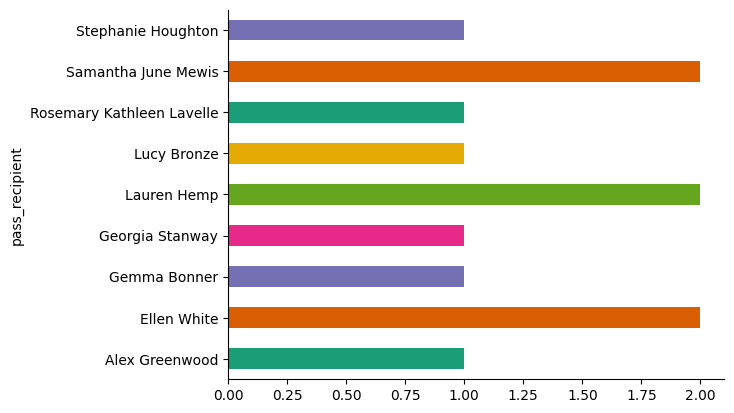

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sequence_goal.groupby('pass_recipient').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### Check Left or Right Corner

In [ ]:
right_corner = sequence_goal.loc[sequence_goal.corner_side=='Right Corner']
left_corner = sequence_goal.loc[sequence_goal.corner_side=='Left Corner']

In [ ]:
right_corner

id_possession                   player             pass_recipient  \
0              20  Janine Elizabeth Beckie         Stephanie Houghton   
1              28              Lauren Hemp        Samantha June Mewis   
2              67  Janine Elizabeth Beckie                Lauren Hemp   
3              69  Janine Elizabeth Beckie             Alex Greenwood   
5             106           Alex Greenwood            Georgia Stanway   
6             122              Chloe Kelly                        NaN   
8             130           Alex Greenwood                Ellen White   
9             136            Caroline Weir               Gemma Bonner   
10            153           Alex Greenwood                Ellen White   
11            154           Alex Greenwood  Rosemary Kathleen Lavelle   

   pass_body_part              corner_type   corner_side interference  \
0       Left Foot   High Pass - Inswinging  Right Corner           No   
1       Left Foot   High Pass - Inswinging  Right Corner          Yes   
2      Right Foot     High Pass - Straight  Right Corner           No   
3      Right Foot  High Pass - Outswinging  Right Corner           No   
5       Left Foot   High Pass - Inswinging  Right Corner          Yes   
6      Right Foot  High Pass - Outswinging  Right Corner          Yes   
8       Left Foot   High Pass - Inswinging  Right Corner          Yes   
9       Left Foot   High Pass - Inswinging  Right Corner           No   
10      Left Foot   High Pass - Inswinging  Right Corner           No   
11      Left Foot   High Pass - Inswinging  Right Corner          Yes   

    total_sequence  \
0              6.0   
1              9.0   
2              3.0   
3              5.0   
5              9.0   
6             15.0   
8              7.0   
9              2.0   
10             2.0   
11            50.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                       sequence  
0                                                                                                                                                                                                                                                                                                                                                                                   Pass - Shot - Goal Keeper - Block - Ball Recovery - Shot -   
1                                                                                                                                                                                                                                                                                                                                              Pass - Shot - Goal Keeper - Ball Recovery - Shot - Block - Goal Keeper - Ball Recovery - Shot -   
2                                                                                                                                                                                                                                                                                                                                                                                                                         Pass - Pass - Shot -   
3                                                                                                                                                                                                                                                                                                                                                                                            Pass - Pass - Miscontrol - Ball Reco

from matplotlib import pyplot as plt
_df_186['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_187['id_possession'].plot(kind='hist', bins=20, title='id_possession')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_188['total_sequence'].plot(kind='hist', bins=20, title='total_sequence')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_189.groupby('player').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_190.groupby('pass_body_part').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_191.groupby('corner_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_192.groupby('interference').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_193.plot(kind='scatter', x='index', y='id_possession', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_194.plot(kind='scatter', x='id_possession', y='total_sequence', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['total_sequence']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_195.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('player')):
  _plot_series(series, series_name, i)
  fig.legend(title='player', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('total_sequence')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['total_sequence']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_196.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('pass_body_part')):
  _plot_series(series, series_name, i)
  fig.legend(title='pass_body_part', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('total_sequence')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['total_sequence']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_197.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('corner_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='corner_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('total_sequence')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['total_sequence']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_198.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('interference')):
  _plot_series(series, series_name, i)
  fig.legend(title='interference', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('total_sequence')

from matplotlib import pyplot as plt
_df_199['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_200['id_possession'].plot(kind='line', figsize=(8, 4), title='id_possession')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_201['total_sequence'].plot(kind='line', figsize=(8, 4), title='total_sequence')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['pass_body_part'].value_counts()
    for x_label, grp in _df_202.groupby('player')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('player')
_ = plt.ylabel('pass_body_part')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['corner_type'].value_counts()
    for x_label, grp in _df_203.groupby('pass_body_part')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('pass_body_part')
_ = plt.ylabel('corner_type')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['interference'].value_counts()
    for x_label, grp in _df_204.groupby('corner_type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('corner_type')
_ = plt.ylabel('interference')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_205['player'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_205, x='index', y='player', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_206['pass_body_part'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_206, x='index', y='pass_body_part', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_207['corner_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_207, x='index', y='corner_type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_208['interference'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_208, x='index', y='interference', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

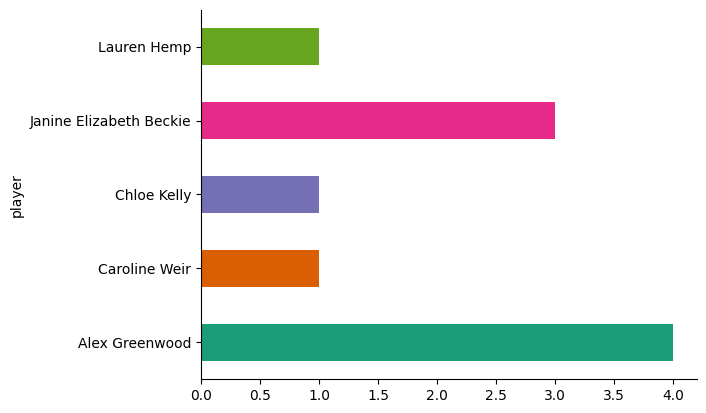

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_95.groupby('player').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

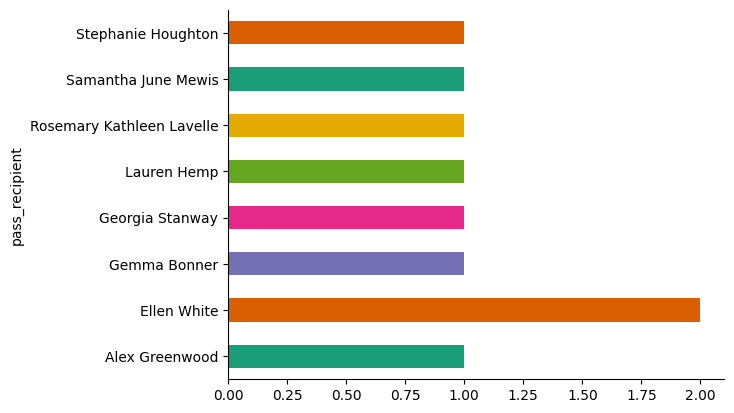

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
right_corner.groupby('pass_recipient').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

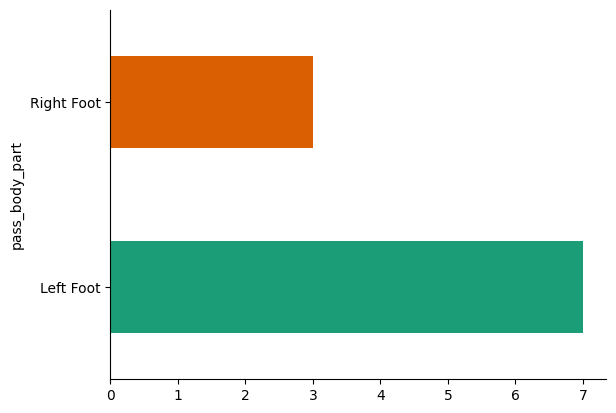

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_96.groupby('pass_body_part').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

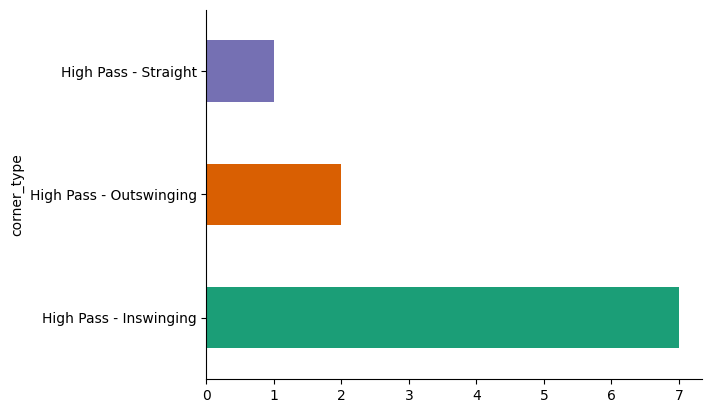

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_97.groupby('corner_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
left_corner

id_possession       player       pass_recipient pass_body_part  \
4              78  Chloe Kelly  Samantha June Mewis     Right Foot   
7             123  Chloe Kelly          Lauren Hemp     Right Foot   
12            157  Chloe Kelly          Lucy Bronze     Right Foot   

               corner_type  corner_side interference  total_sequence  \
4   High Pass - Inswinging  Left Corner           No             2.0   
7   High Pass - Inswinging  Left Corner           No             2.0   
12  High Pass - Inswinging  Left Corner          Yes             4.0   

                             sequence  
4                      Pass - Shot -   
7                      Pass - Shot -   
12  Pass - Clearance - Pass - Shot -

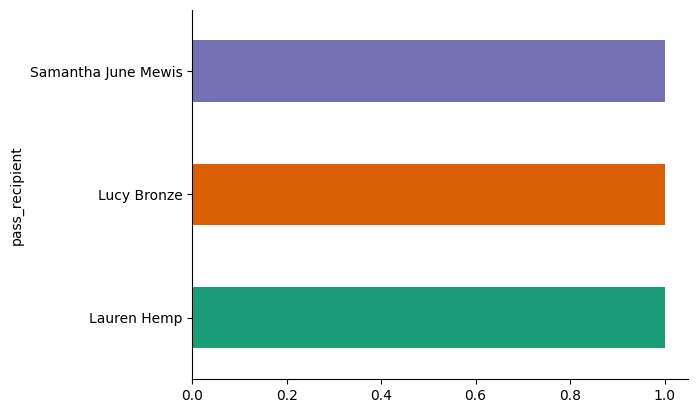

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
left_corner.groupby('pass_recipient').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### Check City Corner Goal Without Other Team Interference


In [ ]:
sequence_goal.loc[sequence_goal.interference=='No']

id_possession                   player pass_body_part  \
0              20  Janine Elizabeth Beckie      Left Foot   
2              67  Janine Elizabeth Beckie     Right Foot   
3              69  Janine Elizabeth Beckie     Right Foot   
4              78              Chloe Kelly     Right Foot   
7             123              Chloe Kelly     Right Foot   
9             136            Caroline Weir      Left Foot   
10            153           Alex Greenwood      Left Foot   

                corner_type   corner_side interference  total_sequence  \
0    High Pass - Inswinging  Right Corner           No             6.0   
2      High Pass - Straight  Right Corner           No             3.0   
3   High Pass - Outswinging  Right Corner           No             5.0   
4    High Pass - Inswinging   Left Corner           No             2.0   
7    High Pass - Inswinging   Left Corner           No             2.0   
9    High Pass - Inswinging  Right Corner           No             2.0   
10   High Pass - Inswinging  Right Corner           No             2.0   

                                             sequence  
0   Pass - Shot - Goal Keeper - Block - Ball Recov...  
2                               Pass - Pass - Shot -   
3   Pass - Pass - Miscontrol - Ball Recovery - Sho...  
4                                      Pass - Shot -   
7                                      Pass - Shot -   
9                                      Pass - Shot -   
10                                     Pass - Shot -

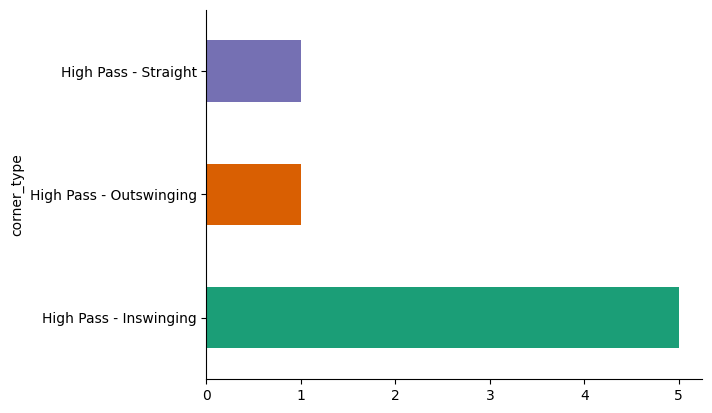

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_51.groupby('corner_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### Visualize Each of City Corner Goal
Here I visualize each of City corner goal sequence so we can see how was the successful corner pattern that was used by Manchester City in the season.

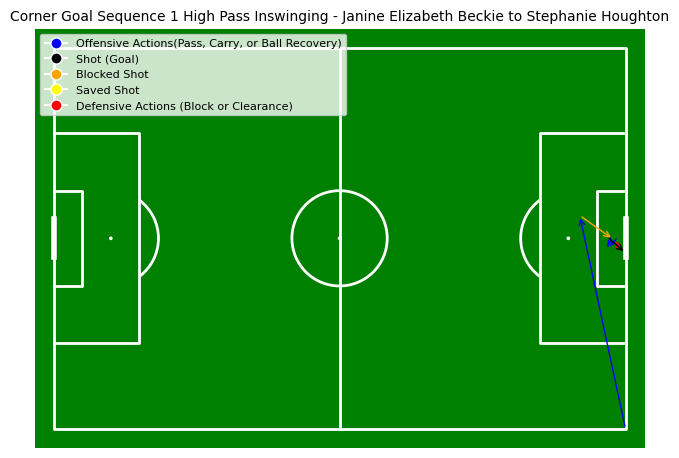

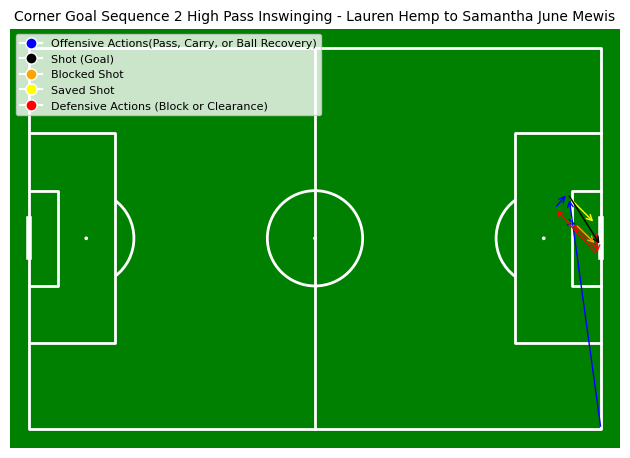

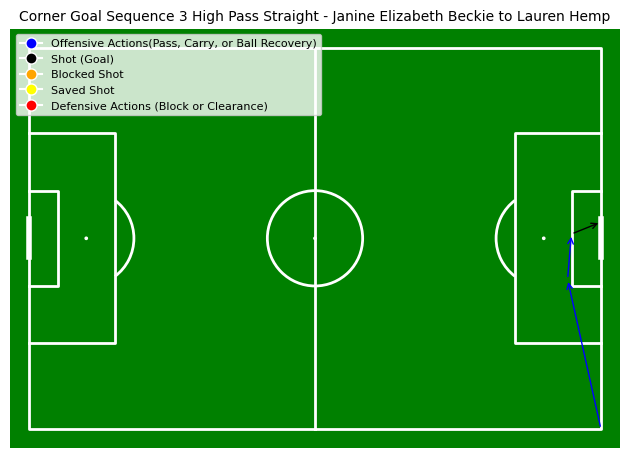

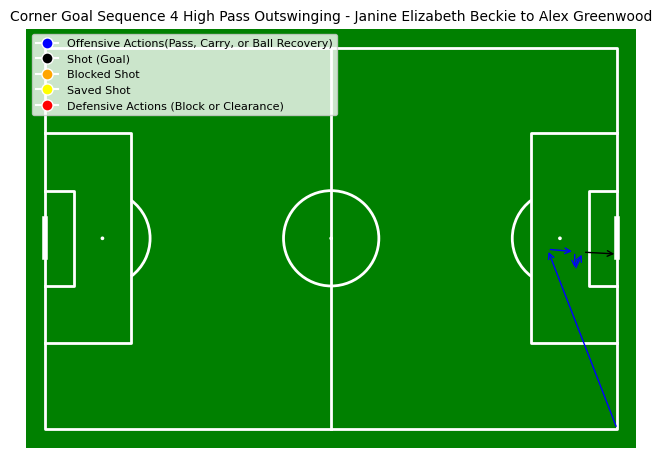

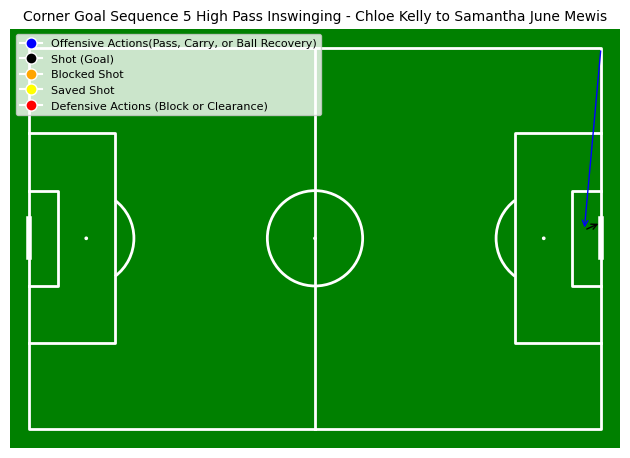

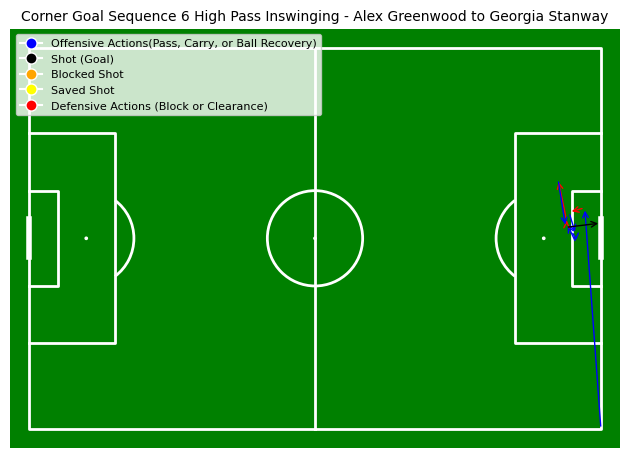

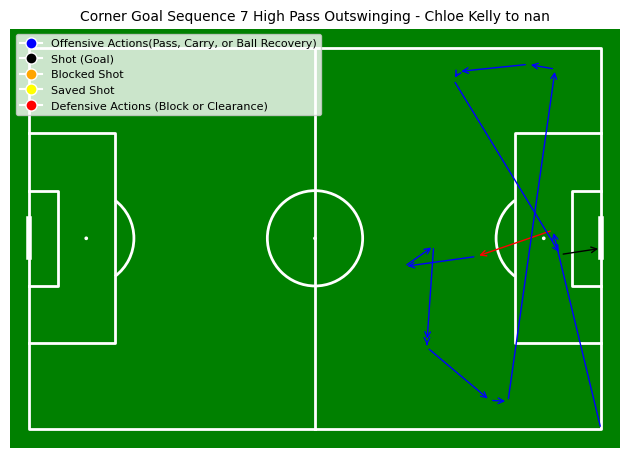

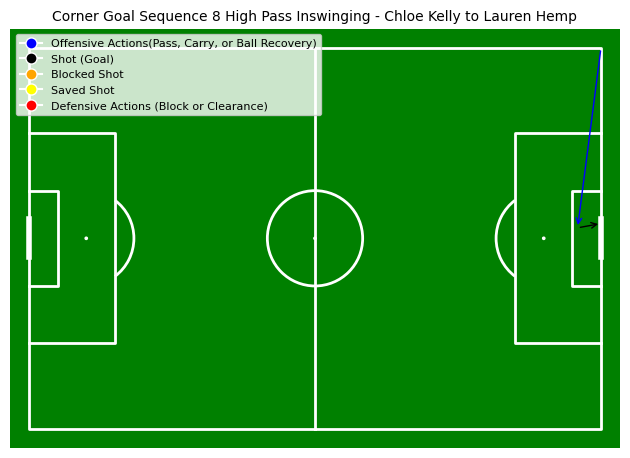

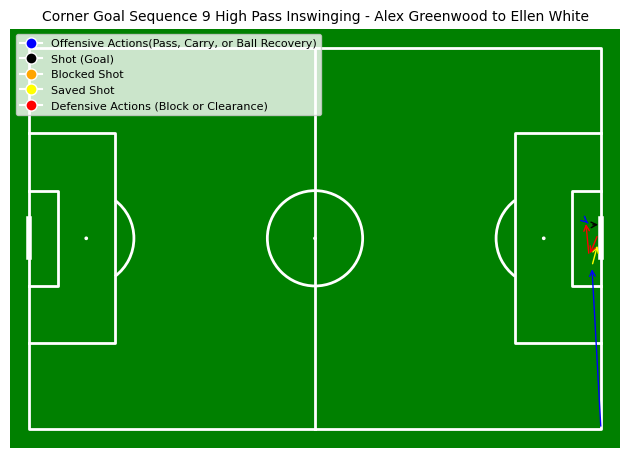

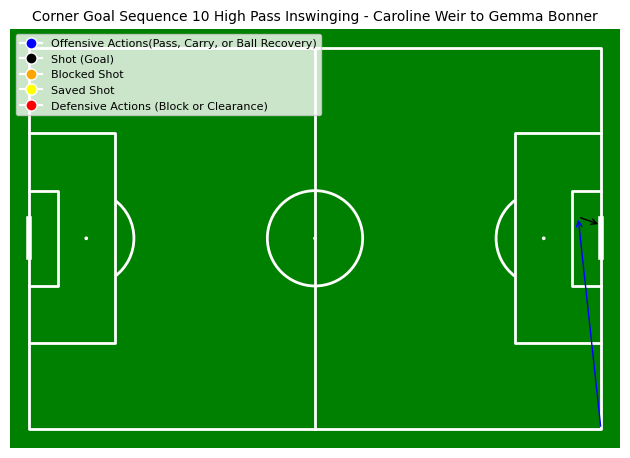

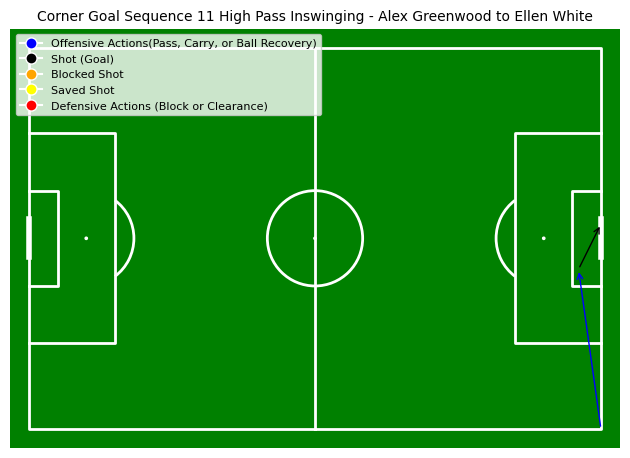

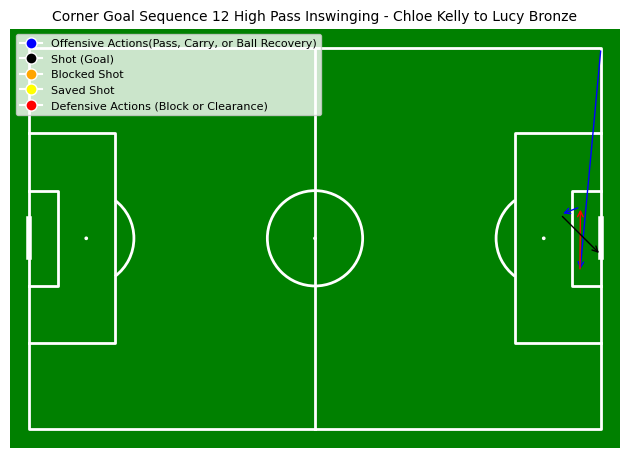

In [ ]:
from matplotlib import pyplot as plt
# pitch = VerticalPitch(pitch_type='statsbomb', half=True, line_zorder=2)
# fig, ax = pitch.draw(figsize=(12, 7))
flag=1
for i in corner_goal.id_possession.unique():

  test = corner_goal.loc[corner_goal.id_possession==i].reset_index()
  if test.total_sequence[0]>20:
    continue
  ph = test.pass_height[0]
  pt = test.pass_technique[0]
  pl = test.player[0]
  pr = test.pass_recipient[0]
  pitch = Pitch(pitch_type='statsbomb', pitch_color='green', line_color='white')
  # Create a figure and axis
  fig, ax = pitch.draw()
  for j in range(len(test)):

      #print(end)
      #print(start)
      x_coord = test['location_x']
      y_coord = test['location_y']
      if test.team[j]!='Manchester City WFC':
        start = (test['location_x'][j], test['location_y'][j])
        end = (test['location_x'][j+1], test['location_y'][j+1])
        ax.annotate("", xy=end, xytext=start, arrowprops=dict(arrowstyle="->", color='red'))
      else:
        if test.shot_outcome[j]=='Goal':
          start = (test['location_x'][j], test['location_y'][j])
          end = (test['shot_location_x'][j], test['shot_location_y'][j])
          ax.annotate("", xy=end, xytext=start, arrowprops=dict(arrowstyle="->", color='black'))
        elif test.shot_outcome[j]=='Blocked':
          start = (test['location_x'][j], test['location_y'][j])
          end = (test['shot_location_x'][j], test['shot_location_y'][j])
          ax.annotate("", xy=end, xytext=start, arrowprops=dict(arrowstyle="->", color='orange'))
        elif test.shot_outcome[j]=='Saved':
          start = (test['location_x'][j], test['location_y'][j])
          end = (test['shot_location_x'][j], test['shot_location_y'][j])
          ax.annotate("", xy=end, xytext=start, arrowprops=dict(arrowstyle="->", color='yellow'))
        else:
          start = (test['location_x'][j], test['location_y'][j])
          end = (test['location_x'][j+1], test['location_y'][j+1])
          ax.annotate("", xy=end, xytext=start, arrowprops=dict(arrowstyle="->", color='blue'))
  ax.set_title(f'Corner Goal Sequence {flag} {ph} {pt} - {pl} to {pr}',size=10)
  flag+=1
  legend_elements = [
      plt.Line2D([0], [0], marker='o', color='w', label='Offensive Actions(Pass, Carry, or Ball Recovery)', markerfacecolor='blue', markersize=8),
      plt.Line2D([0], [0], marker='o', color='w', label='Shot (Goal)', markerfacecolor='black', markersize=8),
      plt.Line2D([0], [0], marker='o', color='w', label='Blocked Shot', markerfacecolor='orange', markersize=8),
      plt.Line2D([0], [0], marker='o', color='w', label='Saved Shot', markerfacecolor='yellow', markersize=8),
      plt.Line2D([0], [0], marker='o', color='w', label='Defensive Actions (Block or Clearance)', markerfacecolor='red', markersize=8)
  ]
  legend = ax.legend(handles=legend_elements, loc='upper left',prop={'size':8 })
  # Set plot title and legend

# Show the plot
plt.show()

## Check City Corner Shot Sequence
I put together corner sequence that resulting into a shot into one dataframe. It will help us to analyze the data easily instead of looking the full data.

In [ ]:
sequence_shot=pd.DataFrame()
for i in corner_shot.id_possession.unique():
  test = corner_shot.loc[corner_shot.id_possession==i].reset_index()
  seq=''
  flag=0
  for j in range(len(test)):

    if j==len(test):
      seq = seq+test.type[j]
    else:
      seq = seq+test.type[j]+' - '
    #print(test.type[j])
    if test.team[j]!='Manchester City WFC' and test.type[j]!='Goal Keeper':
      flag=1
  all = pd.DataFrame({'id_possession':i},index=[1])
  all['player'] = test.player[0]
  all['pass_recipient']=test.pass_recipient[0]
  all['pass_body_part'] = test.pass_body_part[0]
  all['corner_type'] = test.pass_height[0]+' - ' +str(test.pass_technique[0])
  if test.location_y[0]==80:
    all['corner_side'] = 'Right Corner'
  else:
    all['corner_side'] = 'Left Corner'
  all['total_sequence'] = test.total_sequence[0]
  if flag==0:
    all['interference'] ='No'
  else:
    all['interference']='Yes'
  all['sequence']=seq
  all['corner_goal'] = test.corner_goal[0]
  #print(test)
  sequence_shot = pd.concat([sequence_shot,all],axis=0).reset_index(drop=True)

In [ ]:
sequence_shot

id_possession                   player             pass_recipient  \
0              17            Caroline Weir           Esme Beth Morgan   
1              18            Caroline Weir           Esme Beth Morgan   
2              20  Janine Elizabeth Beckie         Stephanie Houghton   
3              22  Janine Elizabeth Beckie                 Jill Scott   
4              25           Alex Greenwood         Stephanie Houghton   
5              27           Alex Greenwood                        NaN   
6              28              Lauren Hemp        Samantha June Mewis   
7              30           Alex Greenwood               Laura Coombs   
8              31           Alex Greenwood                Lauren Hemp   
9              32           Alex Greenwood            Abby Dahlkemper   
10             34              Chloe Kelly                Lauren Hemp   
11             35           Alex Greenwood                Keira Walsh   
12             41           Alex Greenwood                Lucy Bronze   
13             43            Caroline Weir             Alex Greenwood   
14             46  Janine Elizabeth Beckie                Lucy Bronze   
15             47  Janine Elizabeth Beckie                        NaN   
16             48           Alex Greenwood        Samantha June Mewis   
17             50           Alex Greenwood           Esme Beth Morgan   
18             52           Alex Greenwood                Lucy Bronze   
19             54            Caroline Weir             Alex Greenwood   
20             61           Alex Greenwood            Georgia Stanway   
21             62           Alex Greenwood                Lucy Bronze   
22             63           Alex Greenwood                Lucy Bronze   
23             64           Alex Greenwood                        NaN   
24             65  Janine Elizabeth Beckie             Alex Greenwood   
25             66           Alex Greenwood    Janine Elizabeth Beckie   
26             67  Janine Elizabeth Beckie                Lauren Hemp   
27             69  Janine Elizabeth Beckie             Alex Greenwood   
28             76           Alex Greenwood                Lauren Hemp   
29             77           Alex Greenwood            Abby Dahlkemper   
30             78              Chloe Kelly        Samantha June Mewis   
31             82            Caroline Weir        Samantha June Mewis   
32             83            Caroline Weir                Ellen White   
33             84            Caroline Weir                Lucy Bronze   
34             85              Chloe Kelly                        NaN   
35             87           Alex Greenwood                        NaN   
36             88           Alex Greenwood                        NaN   
37             89           Alex Greenwood                        NaN   
38             91           Alex Greenwood                Lucy Bronze   
39             92              Chloe Kelly                Lucy Bronze   
40             93           Alex Greenwood                Lucy Bronze   
41             99              Chloe Kelly        Samantha June Mewis   
42            102              Chloe Kelly    Janine Elizabeth Beckie   
43            106           Alex Greenwood            Georgia Stanway   
44            108           Alex Greenwood        Samantha June Mewis   
45            109           Alex Greenwood         Stephanie Houghton   
46            111           Alex Greenwood                        NaN   
47            113           Alex Greenwood               Gemma Bonner   
48            114           Alex Greenwood               Gemma Bonner   
49            117  Janine Elizabeth Beckie             Alex Greenwood   
50            119  Janine Elizabeth Beckie             Alex Greenwood   
51            121  Janine Elizabeth Beckie               Laura Coombs   
52            122              Chloe Kelly                        NaN   
53            123              Chloe Kelly                Laur

from matplotlib import pyplot as plt
_df_233['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_234['id_possession'].plot(kind='hist', bins=20, title='id_possession')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_235['total_sequence'].plot(kind='hist', bins=20, title='total_sequence')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_236['corner_goal'].plot(kind='hist', bins=20, title='corner_goal')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_237.groupby('player').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_238.groupby('pass_body_part').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_239.groupby('corner_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_240.groupby('corner_side').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_241.plot(kind='scatter', x='index', y='id_possession', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_242.plot(kind='scatter', x='id_possession', y='total_sequence', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_243.plot(kind='scatter', x='total_sequence', y='corner_goal', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['total_sequence']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_244.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('player')):
  _plot_series(series, series_name, i)
  fig.legend(title='player', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('total_sequence')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['total_sequence']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_245.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('pass_body_part')):
  _plot_series(series, series_name, i)
  fig.legend(title='pass_body_part', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('total_sequence')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['total_sequence']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_246.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('corner_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='corner_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('total_sequence')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['total_sequence']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_247.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('corner_side')):
  _plot_series(series, series_name, i)
  fig.legend(title='corner_side', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('total_sequence')

from matplotlib import pyplot as plt
_df_248['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_249['id_possession'].plot(kind='line', figsize=(8, 4), title='id_possession')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_250['total_sequence'].plot(kind='line', figsize=(8, 4), title='total_sequence')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_251['corner_goal'].plot(kind='line', figsize=(8, 4), title='corner_goal')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['pass_body_part'].value_counts()
    for x_label, grp in _df_252.groupby('player')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('player')
_ = plt.ylabel('pass_body_part')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['corner_type'].value_counts()
    for x_label, grp in _df_253.groupby('pass_body_part')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('pass_body_part')
_ = plt.ylabel('corner_type')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['corner_side'].value_counts()
    for x_label, grp in _df_254.groupby('corner_type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('corner_type')
_ = plt.ylabel('corner_side')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['interference'].value_counts()
    for x_label, grp in _df_255.groupby('corner_side')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('corner_side')
_ = plt.ylabel('interference')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_256['player'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_256, x='index', y='player', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_257['pass_body_part'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_257, x='index', y='pass_body_part', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_258['corner_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_258, x='index', y='corner_type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_259['corner_side'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_259, x='index', y='corner_side', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

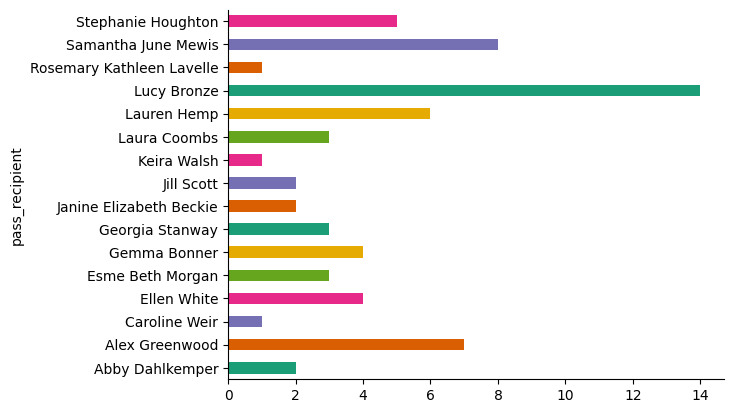

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sequence_shot.groupby('pass_recipient').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### Check Left or Right Corner

In [ ]:
right_corner = sequence_shot.loc[sequence_shot.corner_side=='Right Corner']
left_corner = sequence_shot.loc[sequence_shot.corner_side=='Left Corner']

In [ ]:
right_corner

id_possession                   player             pass_recipient  \
2              20  Janine Elizabeth Beckie         Stephanie Houghton   
3              22  Janine Elizabeth Beckie                 Jill Scott   
4              25           Alex Greenwood         Stephanie Houghton   
5              27           Alex Greenwood                        NaN   
6              28              Lauren Hemp        Samantha June Mewis   
7              30           Alex Greenwood               Laura Coombs   
8              31           Alex Greenwood                Lauren Hemp   
10             34              Chloe Kelly                Lauren Hemp   
11             35           Alex Greenwood                Keira Walsh   
13             43            Caroline Weir             Alex Greenwood   
14             46  Janine Elizabeth Beckie                Lucy Bronze   
15             47  Janine Elizabeth Beckie                        NaN   
24             65  Janine Elizabeth Beckie             Alex Greenwood   
25             66           Alex Greenwood    Janine Elizabeth Beckie   
26             67  Janine Elizabeth Beckie                Lauren Hemp   
27             69  Janine Elizabeth Beckie             Alex Greenwood   
28             76           Alex Greenwood                Lauren Hemp   
31             82            Caroline Weir        Samantha June Mewis   
32             83            Caroline Weir                Ellen White   
33             84            Caroline Weir                Lucy Bronze   
35             87           Alex Greenwood                        NaN   
38             91           Alex Greenwood                Lucy Bronze   
40             93           Alex Greenwood                Lucy Bronze   
41             99              Chloe Kelly        Samantha June Mewis   
43            106           Alex Greenwood            Georgia Stanway   
44            108           Alex Greenwood        Samantha June Mewis   
45            109           Alex Greenwood         Stephanie Houghton   
46            111           Alex Greenwood                        NaN   
47            113           Alex Greenwood               Gemma Bonner   
48            114           Alex Greenwood               Gemma Bonner   
49            117  Janine Elizabeth Beckie             Alex Greenwood   
50            119  Janine Elizabeth Beckie             Alex Greenwood   
51            121  Janine Elizabeth Beckie               Laura Coombs   
52            122              Chloe Kelly                        NaN   
54            130           Alex Greenwood                Ellen White   
55            134            Caroline Weir                        NaN   
56            135            Caroline Weir               Gemma Bonner   
57            136            Caroline Weir               Gemma Bonner   
59            140            Caroline Weir                 Jill Scott   
60            141           Alex Greenwood         Stephanie Houghton   
62            148           Alex Greenwood                Lucy Bronze   
66            153           Alex Greenwood                Ellen White   
67            154           Alex Greenwood  Rosemary Kathleen Lavelle   
68            155           Alex Greenwood                Ellen White   
72            160              Chloe Kelly              Caroline Weir   
73            162           Alex Greenwood         Stephanie Houghton   
74            163           Alex Greenwood                        NaN   

   pass_body_part              corner_type   corner_side  total_sequence  \
2       Left Foot   High Pass - Inswinging  Right Corner             6.0   
3      Right Foot  High Pass - Outswinging  Right Corner             3.0   
4       Left Foot   High Pass - Inswinging  Right Corner             3.0   
5       Left Foot   High Pass - Inswinging  Right Corner            13.0   
6       Left Foot   High Pass - Inswinging  Right Corner             9.0   
7       Left Foot        Ground Pass - nan 

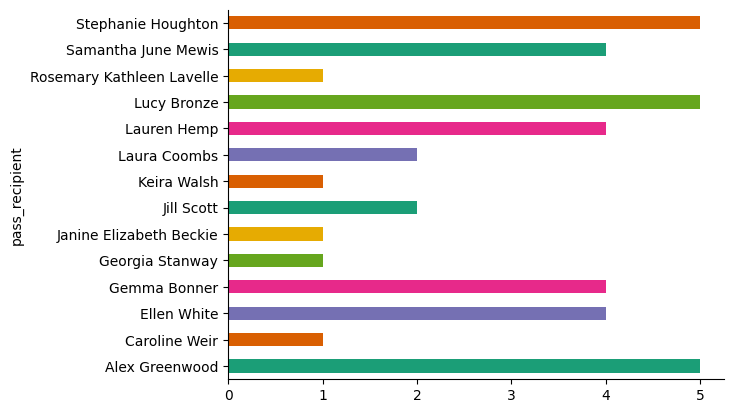

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
right_corner.groupby('pass_recipient').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

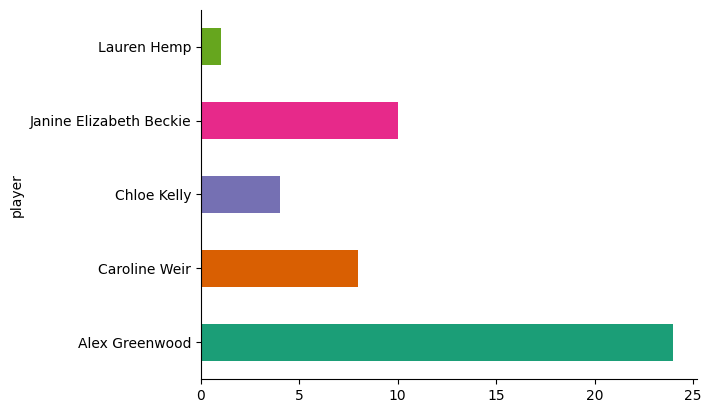

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_138.groupby('player').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

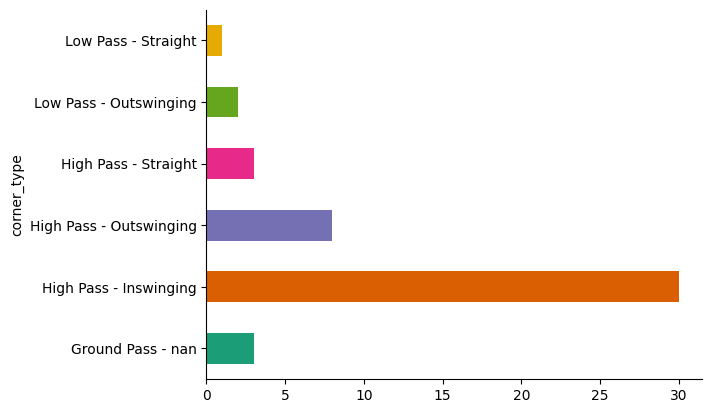

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_140.groupby('corner_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
left_corner

id_possession                   player pass_body_part  \
0              17            Caroline Weir     Right Foot   
1              18            Caroline Weir      Left Foot   
9              32           Alex Greenwood      Left Foot   
12             41           Alex Greenwood      Left Foot   
16             48           Alex Greenwood      Left Foot   
17             50           Alex Greenwood      Left Foot   
18             52           Alex Greenwood      Left Foot   
19             54            Caroline Weir      Left Foot   
20             61           Alex Greenwood      Left Foot   
21             62           Alex Greenwood      Left Foot   
22             63           Alex Greenwood      Left Foot   
23             64           Alex Greenwood      Left Foot   
29             77           Alex Greenwood      Left Foot   
30             78              Chloe Kelly     Right Foot   
34             85              Chloe Kelly     Right Foot   
36             88           Alex Greenwood     Right Foot   
37             89           Alex Greenwood      Left Foot   
39             92              Chloe Kelly     Right Foot   
42            102              Chloe Kelly     Right Foot   
53            123              Chloe Kelly     Right Foot   
58            138  Janine Elizabeth Beckie     Right Foot   
61            145              Chloe Kelly     Right Foot   
63            150           Alex Greenwood      Left Foot   
64            151           Alex Greenwood      Left Foot   
65            152           Alex Greenwood      Left Foot   
69            156           Alex Greenwood      Left Foot   
70            157              Chloe Kelly     Right Foot   
71            158           Alex Greenwood      Left Foot   
75            164           Alex Greenwood      Left Foot   
76            165           Alex Greenwood      Left Foot   
77            169           Alex Greenwood      Left Foot   

                corner_type  corner_side  total_sequence interference  \
0    High Pass - Inswinging  Left Corner             3.0           No   
1   High Pass - Outswinging  Left Corner             6.0          Yes   
9      High Pass - Straight  Left Corner            11.0          Yes   
12  High Pass - Outswinging  Left Corner             3.0           No   
16  High Pass - Outswinging  Left Corner             3.0           No   
17  High Pass - Outswinging  Left Corner             7.0           No   
18  High Pass - Outswinging  Left Corner            16.0          Yes   
19  High Pass - Outswinging  Left Corner            20.0          Yes   
20  High Pass - Outswinging  Left Corner            42.0          Yes   
21  High Pass - Outswinging  Left Corner             9.0          Yes   
22        Ground Pass - nan  Left Corner            54.0          Yes   
23  High Pass - Outswinging  Left Corner            13.0          Yes   
29  High Pass - Outswinging  Left Corner             3.0           No   
30   High Pass - Inswinging  Left Corner             2.0           No   
34   High Pass - Inswinging  Left Corner            26.0          Yes   
36   High Pass - Inswinging  Left Corner            10.0          Yes   
37  High Pass - Outswinging  Left Corner             9.0          Yes   
39   High Pass - Inswinging  Left Corner             3.0           No   
42   High Pass - Inswinging  Left Corner             3.0           No   
53   High Pass - Inswinging  Left Corner             2.0           No   
58   High Pass - Inswinging  Left Corner            12.0          Yes   
61        Ground Pass - nan  Left Corner             7.0           No   
63  High Pass - Outswinging  Left Corner             7.0           No   
64  High Pass - Outswinging  Left Corner             5.0          Yes   
65  High Pass - Outswinging  Left Corner             4.0          Yes   
69  High Pass - Outswinging  Left Corner            15.0           No   
70   High Pass - Inswinging  Left Corner             4.0          Yes   
71     

from matplotlib import pyplot as plt
_df_160['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_161['id_possession'].plot(kind='hist', bins=20, title='id_possession')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_162['total_sequence'].plot(kind='hist', bins=20, title='total_sequence')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_163['corner_goal'].plot(kind='hist', bins=20, title='corner_goal')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_164.groupby('player').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_165.groupby('pass_body_part').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_166.groupby('corner_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_167.groupby('interference').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_168.plot(kind='scatter', x='index', y='id_possession', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_169.plot(kind='scatter', x='id_possession', y='total_sequence', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_170.plot(kind='scatter', x='total_sequence', y='corner_goal', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['total_sequence']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_171.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('player')):
  _plot_series(series, series_name, i)
  fig.legend(title='player', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('total_sequence')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['total_sequence']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_172.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('pass_body_part')):
  _plot_series(series, series_name, i)
  fig.legend(title='pass_body_part', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('total_sequence')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['total_sequence']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_173.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('corner_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='corner_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('total_sequence')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['total_sequence']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_174.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('interference')):
  _plot_series(series, series_name, i)
  fig.legend(title='interference', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('total_sequence')

from matplotlib import pyplot as plt
_df_175['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_176['id_possession'].plot(kind='line', figsize=(8, 4), title='id_possession')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_177['total_sequence'].plot(kind='line', figsize=(8, 4), title='total_sequence')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_178['corner_goal'].plot(kind='line', figsize=(8, 4), title='corner_goal')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['pass_body_part'].value_counts()
    for x_label, grp in _df_179.groupby('player')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('player')
_ = plt.ylabel('pass_body_part')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['corner_type'].value_counts()
    for x_label, grp in _df_180.groupby('pass_body_part')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('pass_body_part')
_ = plt.ylabel('corner_type')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['interference'].value_counts()
    for x_label, grp in _df_181.groupby('corner_type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('corner_type')
_ = plt.ylabel('interference')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_182['player'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_182, x='index', y='player', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_183['pass_body_part'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_183, x='index', y='pass_body_part', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_184['corner_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_184, x='index', y='corner_type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_185['interference'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_185, x='index', y='interference', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

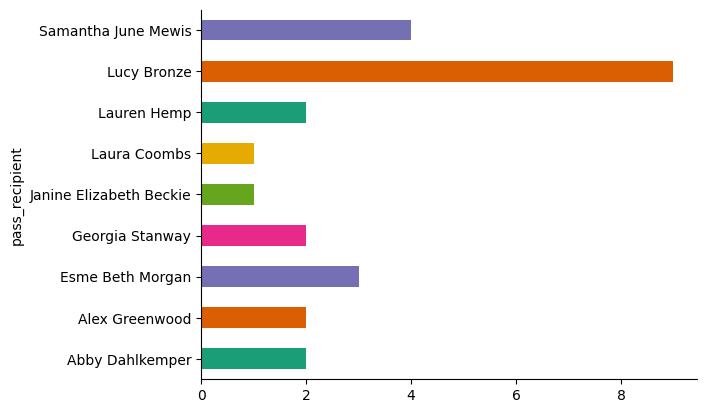

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
left_corner.groupby('pass_recipient').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

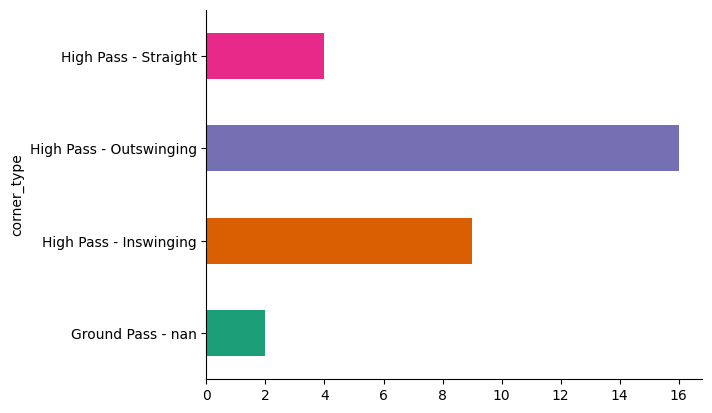

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_166.groupby('corner_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

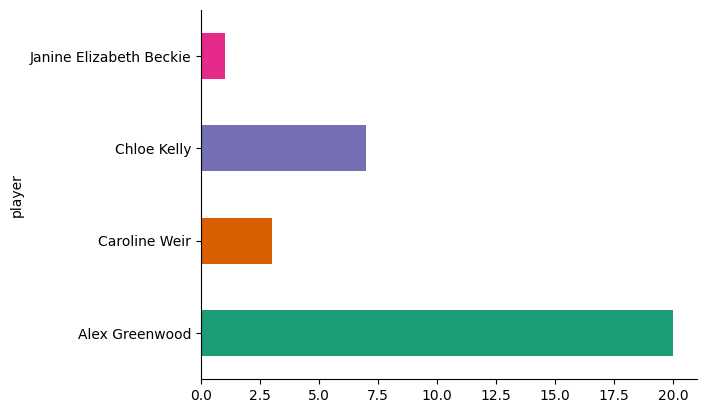

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_164.groupby('player').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### Check City Corner Shot Without Other Team Interference and Not Resulting Into a Goal


In [ ]:
sequence_shot_nogoal =sequence_shot.loc[(sequence_shot.interference=='No')&(sequence_shot.corner_goal==0)]
sequence_shot_nogoal

id_possession                   player pass_body_part  \
0              17            Caroline Weir     Right Foot   
3              22  Janine Elizabeth Beckie     Right Foot   
4              25           Alex Greenwood      Left Foot   
12             41           Alex Greenwood      Left Foot   
16             48           Alex Greenwood      Left Foot   
17             50           Alex Greenwood      Left Foot   
25             66           Alex Greenwood      Left Foot   
29             77           Alex Greenwood      Left Foot   
31             82            Caroline Weir      Left Foot   
38             91           Alex Greenwood      Left Foot   
39             92              Chloe Kelly     Right Foot   
42            102              Chloe Kelly     Right Foot   
44            108           Alex Greenwood      Left Foot   
45            109           Alex Greenwood      Left Foot   
50            119  Janine Elizabeth Beckie     Right Foot   
56            135            Caroline Weir      Left Foot   
59            140            Caroline Weir      Left Foot   
60            141           Alex Greenwood     Right Foot   
61            145              Chloe Kelly     Right Foot   
63            150           Alex Greenwood      Left Foot   
69            156           Alex Greenwood      Left Foot   
72            160              Chloe Kelly     Right Foot   
76            165           Alex Greenwood      Left Foot   

                corner_type   corner_side  total_sequence interference  \
0    High Pass - Inswinging   Left Corner             3.0           No   
3   High Pass - Outswinging  Right Corner             3.0           No   
4    High Pass - Inswinging  Right Corner             3.0           No   
12  High Pass - Outswinging   Left Corner             3.0           No   
16  High Pass - Outswinging   Left Corner             3.0           No   
17  High Pass - Outswinging   Left Corner             7.0           No   
25   High Pass - Inswinging  Right Corner             3.0           No   
29  High Pass - Outswinging   Left Corner             3.0           No   
31   High Pass - Inswinging  Right Corner             3.0           No   
38   High Pass - Inswinging  Right Corner             3.0           No   
39   High Pass - Inswinging   Left Corner             3.0           No   
42   High Pass - Inswinging   Left Corner             3.0           No   
44   High Pass - Inswinging  Right Corner             3.0           No   
45   High Pass - Inswinging  Right Corner             3.0           No   
50   Low Pass - Outswinging  Right Corner             3.0           No   
56   High Pass - Inswinging  Right Corner             3.0           No   
59   High Pass - Inswinging  Right Corner             3.0           No   
60  High Pass - Outswinging  Right Corner             2.0           No   
61        Ground Pass - nan   Left Corner             7.0           No   
63  High Pass - Outswinging   Left Corner             7.0           No   
69  High Pass - Outswinging   Left Corner            15.0           No   
72      Low Pass - Straight  Right Corner             2.0           No   
76     High Pass - Straight   Left Corner             3.0           No   

                                             sequence  corner_goal  
0                        Pass - Shot - Goal Keeper -           0.0  
3                        Pass - Shot - Goal Keeper -           0.0  
4                        Pass - Shot - Goal Keeper -           0.0  
12                       Pass - Shot - Goal Keeper -           0.0  
16                       Pass - Shot - Goal Keeper -           0.0  
17  Pass - Shot - Goal Keeper - Ball Recovery - Sh...          0.0  
25                       Pass - Shot - Goal Keeper -           0.0  
29                       Pass - Shot - Goal Keeper -           0.0  
31                       Pass - Shot - Goal Keeper -           0.0  
38                       Pass - Shot - Goal Keeper -           0.0  
39 

# Conclusion
## Assignment 1
Alex Greenwood been the most dominant corner taker for Manchester City. But from the data we obtain, we can see another insight that the most frequent taker not always the most efficient and the best taker. The goal to corner ratio I used here is based on corner that lead to goal divided by corner that lead to shot. The data I used here also not from all corner, but only corner that lead to shot.

1.  **Right Corner**
*   Most used technique is High Pass - Inswinging using Left Foot with 30 times.
*   Based on corner lead to goal and corner lead to shot data with and without interference, Alex Greenwood or Janine Elizabeth Beckie are the best taker for right corner with goal to corner ratio 4/24 and 3/10
*   If we try using High Pass - Inswinging Left Foot Corner, Alex Greenwood is the most suitable taker but if we want to using some variations, Janine Elizabeth Beckie is a great second choice
*   The goal that happened from right corner aimed at the middle 3 times, far post 3 times, and near post 3 times
*   The best target to receive right corner is Ellen White with 2/4 goal to corner. Both of her goal was at near post, so it is statistically better to aim at near post if we try to find Ellen White.
*   Houghton and Bronze both receive the ball 5 times from right corner, but only Houghton corner sequence turned into a goal.
*   Mewis and Hemp also could be a good corner ball receiver from the right corner with both at 1/4 goal to corner ratio.

2.   **Left Corner**
*   Most used technique is High Pass - Outswinging using Left Foot with 16 times and tailed by High Pass - Inswinging using Right Foot with 7 times.
*   Based on corner lead to goal and corner lead to shot data with and without interference, Alex Greenwood or Chloe Kelly are the best taker for left corner with goal to corner ratio 0/20 and 3/7.
*   0/20 is not that bad even if its not looking effective and effiecient. That's because it still leads to 20 shots which means 20 chances. But, for sure Chloe Kelly with 3/7 ratio needs to take more of the left corner with the High - Pass Inswinging using Right Foot technique.
*   If we try using High Pass - Inswinging Right Foot Corner, Chloe Kelly is the most suitable taker but if we want to using some variations, Alex Greenwood is a great second choice
*   The goal that happened from right corner aimed at the far post 1 time, and near post 2 times
*   The best target to receive right corner is Lucy Bronze with 1/8 goal to corner. The corner that turn into shooting chance is so many when we aim at Lucy Bronze, so I think Bronze is a great ball receiver for left corner with the ball aimed at near post.
*   Mewis receive the ball 4 times from left corner and turn it into a goal once so Mewis is the second choice to aim from left corner.
*   Hemp also could be a good corner ball receiver from the right corner at 1/2 goal to corner ratio.

**Further Analysis**
*   We need to check other corner sequence that leads to nothing to analyze and compare the effectiveness and efficiency of corner sequence and the taker themselves.
*   We could also analyze Chelsea corner defense to check which area is the most vulnerable from corner in Chelsea defense.
*   We could adopt another club corner sequence to be used at Chelsea game, but need to analyze other team's data.
*   We can analyze more about other team's defense when defending a corner. We can look for which area that when the player receive the ball, they can shot or pass with less pressure from the opposition.


Note = The receiver of the pass isn't always the goalscorer. The receiver could pass the ball or shot the ball (but no goal).

## Assignment 2
With event data, we can evaluate team's defense even we didn't track the defender movement. With event data, we can see how easy or hard the player do something with the ball without being pressured by other team. We can also check how many times and in which area the player do some defensive duties like intercept the ball, recover the ball, press the ball carrier, block a shot, tackle the ball carrier, and many others. The only downside is we can't really see the team's defensive structure and defensive line because we don't have the exact location for each player when defending in event data.